# Exercício 1 de Análise de Componentes Independentes em imagens


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro
from scipy.misc import imread

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [37]:
def image_histogram_equalization(image, number_bins=256):
    # from http://www.janeriksolem.net/2009/06/histogram-equalization-with-python-and.html

    # get image histogram
    image_histogram, bins = np.histogram(image.flatten(), number_bins, normed=True)
    cdf = image_histogram.cumsum() # cumulative distribution function
    cdf = 255 * cdf / cdf[-1] # normalize

    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf)

    return image_equalized.reshape(image.shape)

def rgb_ICA(ICA_method, mixturesRGB, learningRate):
    y = np.zeros(mixturesRGB.shape)
    plt.imshow(np.reshape(mixturesRGB[0,:,:], (400, 500, 3)))
    plt.show()
    print(mixturesRGB[0].shape)
    [y[:, :, 0], Wr] = ICA_method(mixturesRGB[:, :, 0], learningRate)
    [y[:, :, 1], Wg] = ICA_method(mixturesRGB[:, :, 1], learningRate)
    [y[:, :, 2], Wb] = ICA_method(mixturesRGB[:, :, 2], learningRate)

    plt.imshow(np.reshape(y[0,:,:], (400, 500, 3)))
    plt.show()
    
    W = [Wr, Wg, Wb]
    #W = Wr
    return y, W
def read_rgb_image(folderPath, n_images = 2, n_channels = 3):
    X1 = imread(folderPath + '\\1_saida.jpg', flatten = False)
    X2 = imread(folderPath + '\\2_saida.jpg', flatten = False)
    
    mixtures = np.zeros((n_images, X1.shape[0]*X1.shape[1], n_channels), np.float64)

    mixtures[0, :, 0] = X1[:,:,0].flatten()
    mixtures[0, :, 1] = X1[:,:,1].flatten()
    mixtures[0, :, 2] = X1[:,:,2].flatten()
    
    mixtures[1, :, 0] = X2[:,:,0].flatten()
    mixtures[1, :, 1] = X2[:,:,1].flatten()
    mixtures[1, :, 2] = X2[:,:,2].flatten()   
    
    original_shape = X1.shape

    return mixtures, original_shape

def rebuildPicture(x, original_shape):
    rebuilt = np.zeros(original_shape, np.float64)
    rebuilt[:, :, 0] = np.reshape(x[:, 0], (original_shape[0], original_shape[1]))
    rebuilt[:, :, 1] = np.reshape(x[:, 1], (original_shape[0], original_shape[1]))
    rebuilt[:, :, 2] = np.reshape(x[:, 2], (original_shape[0], original_shape[1]))
    
    return rebuilt

In [38]:
learning_rate = 1e-6
n_images = 2

(2, 200000, 3)
(400, 500, 3)
(400, 500, 3)


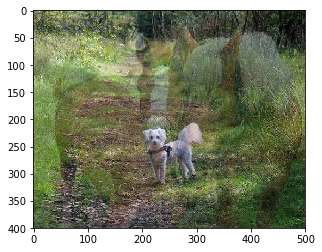

In [39]:
folderPath = 'E:\\OneDrive\\Documentos\\UFRJ\\Mestrado\\PEE\\ICA\\imagens\\base_imagens_ica\\1_run'
mixtures, original_shape = read_rgb_image(folderPath)
print(mixtures.shape)
print(original_shape)
picture = rebuildPicture(mixtures[0], original_shape)
print(picture.shape)
plt.imshow(-picture)

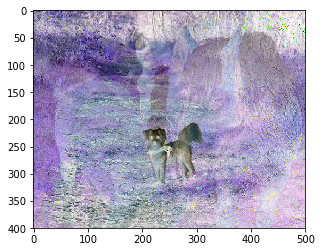

(200000, 3)
Execution time: 72.8911943435669 seconds
Execution time: 70.99495601654053 seconds
Execution time: 72.13660407066345 seconds


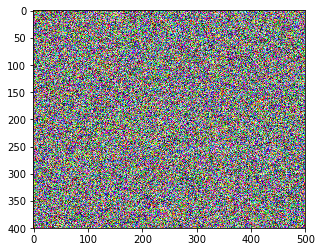

In [40]:
[yNPCA, WNPCA] = rgb_ICA(NPCA_RLS, mixtures, 0.9993)

In [46]:
print(WNPCA)
print(mixtures.shape)
plt.imshow(np.reshape(np.dot(WNPCA, mixtures[:,:,:])[0] ,(400,500, 3)))


[array([[ 1.55791992,  0.16410428],
       [ 0.84781405, -0.16317801]]), array([[-4.16907558,  0.30915122],
       [ 2.5649097 , -0.63354303]]), array([[-0.8774823 ,  1.66258389],
       [ 1.3019705 ,  1.33050677]])]
(2, 200000, 3)


ValueError: shapes (3,2,2) and (2,200000,3) not aligned: 2 (dim 2) != 200000 (dim 1)

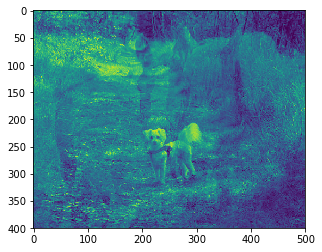

(2, 200000)
Execution time: 111.65610384941101 seconds


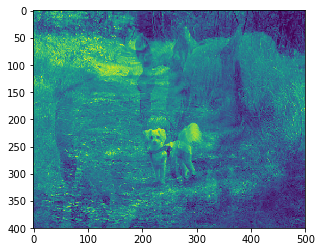

In [32]:
[y, WFeedback] = rgb_ICA(cichocki_Feedback, mixtures, 1e-3)

[[  1.00003935e+00   3.84007348e-07]
 [ -5.83123425e-06   9.99996491e-01]]


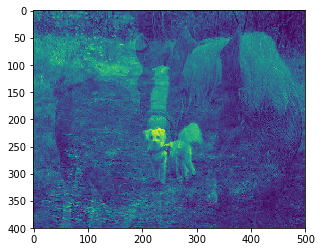

In [31]:
plt.imshow(np.reshape(np.dot(WFeedback, mixtures[:,:,2])[1] ,(400,500)))
print(WFeedback)

In [ ]:
reconstructed_yForward = np.reshape(np.dot(WForward, mixtures), (n_images, ) + original_shape)
plt.figure(figsize = (12,12))
if len(original_shape) == 2:
    plt.imshow(reconstructed_yForward[0], cmap = 'gray')
else:
    plt.imshow(reconstructed_yForward[0])